In [1]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Deploy params - withing Supervise.ly go to
# Cluster->Tasks->"Deploy API info" to fill these variables 
api_key = 'Your API token'
url = 'Your Url'
# Image path
image_path = '/src/dl_heroes.jpg'

In [3]:
headers = {"X-API-KEY": api_key}
files = {"image": open(image_path, 'rb')}

In [4]:
# Make API request
req = requests.post(url, headers=headers, files=files)
data = req.json()

5 objects exists


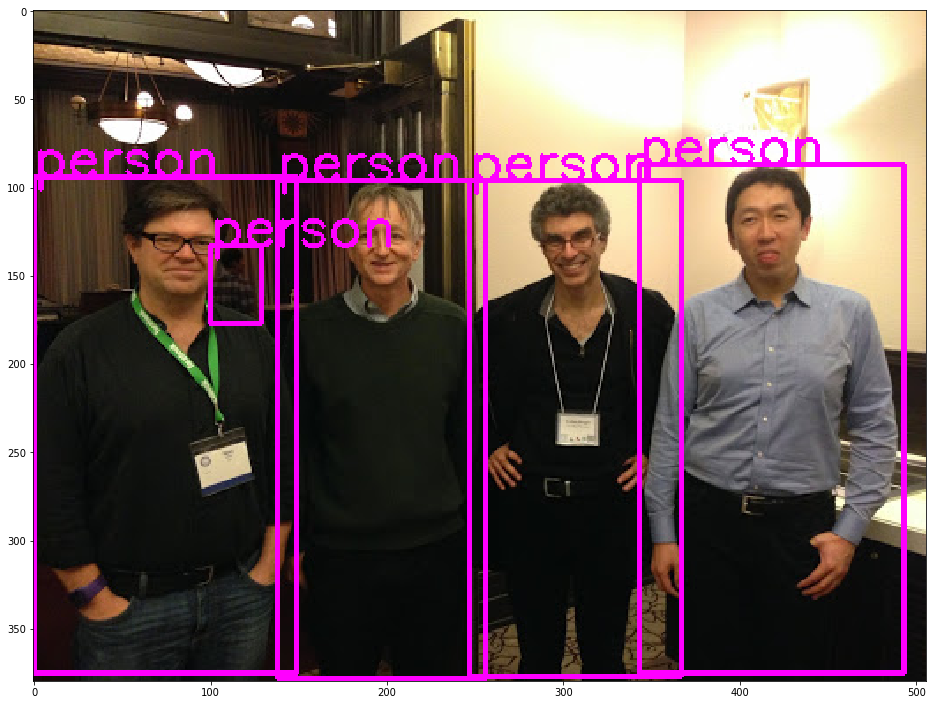

In [6]:
# Draw results
img = cv2.imread(image_path)[:,:,::-1].copy()
objects = data[0]['objects']

print('{} objects exists'.format(len(objects)))
for obj in objects:
    # comment to draw all classes 
    if obj['classTitle'] != 'person':
        continue
    exterior = obj['points']['exterior']
    cv2.rectangle(img, tuple(exterior[0]), tuple(exterior[1]), (255, 0, 255), thickness=2)
    cv2.putText(img, obj['classTitle'], tuple(exterior[0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)
_ = plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.show()